In [ ]:
import sys

if "google.colab" in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/easy_train.csv',encoding='utf-8')
test=pd.read_csv('/content/drive/MyDrive/esay_test.csv',encoding='utf-8')
sample_submission=pd.read_csv('/content/drive/MyDrive/easy_sample_submission_7.csv',encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,index,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,...,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
0,0,2248930.5,28963.0,20237.0,59.854076,45.197918,259.916656,449.916656,47.500,8663.0,...,260.75,452.75,10417.0,7304.0,48.71875,260.75,448.75,정상,경고,주의
1,1,0.0,0.0,0.0,0.000000,101.312500,0.000000,0.000000,24.375,0.0,...,0.00,0.00,0.0,0.0,100.68750,0.00,0.00,경고,정상,정상
2,2,5375707.0,35244.0,19826.0,59.975650,107.385414,125.416664,216.750000,18.750,11988.0,...,125.25,216.25,12236.0,6170.0,109.56250,125.00,216.25,정상,정상,주의
3,3,17781200.0,77056.0,39520.0,59.863000,244.854000,118.083000,205.333000,23.125,25796.0,...,118.75,118.75,24992.0,13704.0,242.18800,118.00,118.00,정상,정상,경고
4,4,10143988.0,0.0,0.0,59.798140,0.000000,133.750000,231.500000,26.875,0.0,...,134.50,231.50,0.0,0.0,0.00000,133.00,230.25,경고,정상,정상


In [ ]:
train.columns

Index(['index', '누적전력량', '유효전력평균', '무효전력평균', '주파수', '전류평균', '상전압평균', '선간전압평균',
       '온도', 'R상유효전력', 'R상무효전력', 'R상전류', 'R상전압', 'R상선간전압', 'S상유효전력', 'S상무효전력',
       'S상전류', 'S상전압', 'S상선간전압', 'T상유효전력', 'T상무효전력', 'T상전류', 'T상전압', 'T상선간전압',
       'label_역률평균', 'label_전류고조파평균', 'label_전압고조파평균'],
      dtype='object')

In [ ]:
test.columns

In [ ]:
test.shape

In [ ]:
train.dtypes

index              int64
누적전력량            float64
유효전력평균           float64
무효전력평균           float64
주파수              float64
전류평균             float64
상전압평균            float64
선간전압평균           float64
온도               float64
R상유효전력           float64
R상무효전력           float64
R상전류             float64
R상전압             float64
R상선간전압           float64
S상유효전력           float64
S상무효전력           float64
S상전류             float64
S상전압             float64
S상선간전압           float64
T상유효전력           float64
T상무효전력           float64
T상전류             float64
T상전압             float64
T상선간전압           float64
label_역률평균        object
label_전류고조파평균     object
label_전압고조파평균     object
dtype: object

In [ ]:
train.shape

(2420565, 27)

In [ ]:
train.isnull().sum()

index               0
누적전력량              17
유효전력평균             17
무효전력평균             17
주파수                17
전류평균               17
상전압평균              17
선간전압평균             17
온도                 17
R상유효전력             18
R상무효전력             18
R상전류               18
R상전압               18
R상선간전압             18
S상유효전력           1380
S상무효전력           1380
S상전류             1380
S상전압             1380
S상선간전압           1380
T상유효전력           2898
T상무효전력           2898
T상전류             2898
T상전압             2898
T상선간전압           2898
label_역률평균          0
label_전류고조파평균       0
label_전압고조파평균       0
dtype: int64

In [ ]:
train['누적전력량'][train['누적전력량'].isnull()]

58148     NaN
84362     NaN
112756    NaN
134213    NaN
314942    NaN
453368    NaN
604576    NaN
636506    NaN
771315    NaN
893046    NaN
910188    NaN
981621    NaN
987163    NaN
1410829   NaN
1583113   NaN
2023192   NaN
2226529   NaN
Name: 누적전력량, dtype: float64

In [ ]:
train.iloc[[84362]]

,index,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,...,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
84362,84362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25752.0,...,123.25,213.75,25568.0,14432.0,238.375,122.75,213.75,정상,정상,경고


In [ ]:
print(train['label_역률평균'].value_counts(),'\n')
print(train['label_전류고조파평균'].value_counts(),'\n')
print(train['label_전압고조파평균'].value_counts())

정상    1317382
경고     948810
주의     154373
Name: label_역률평균, dtype: int64 

정상    1953656
주의     391041
경고      75868
Name: label_전류고조파평균, dtype: int64 

정상    994194
경고    735155
주의    691216
Name: label_전압고조파평균, dtype: int64


In [ ]:
import numpy as np
print(train[train['누적전력량']==0]['label_역률평균'].value_counts(),'\n')
print(train[train['주파수']<50]['label_전류고조파평균'].value_counts(),'\n')
print(train[train['주파수']<50]['label_전압고조파평균'].value_counts())

경고    160829
Name: label_역률평균, dtype: int64 

정상    50696
주의    27054
경고    10416
Name: label_전류고조파평균, dtype: int64 

정상    88159
주의        4
경고        3
Name: label_전압고조파평균, dtype: int64


In [ ]:
train_processed=train.copy()
test_processed=test.copy()
train_processed.drop('index',axis=1,inplace=True)
test_processed.drop('ID',axis=1,inplace=True)

In [ ]:
# 정상->0 , 주의->1, 경고->2

train_processed['label_역률평균']=train_processed['label_역률평균'].str.replace('정상','0')
train_processed['label_역률평균']=train_processed['label_역률평균'].str.replace('주의','1')
train_processed['label_역률평균']=train_processed['label_역률평균'].str.replace('경고','2').apply(int)
train_processed['label_전류고조파평균']=train_processed['label_전류고조파평균'].str.replace('정상','0')
train_processed['label_전류고조파평균']=train_processed['label_전류고조파평균'].str.replace('주의','1')
train_processed['label_전류고조파평균']=train_processed['label_전류고조파평균'].str.replace('경고','2').apply(int)
train_processed['label_전압고조파평균']=train_processed['label_전압고조파평균'].str.replace('정상','0')
train_processed['label_전압고조파평균']=train_processed['label_전압고조파평균'].str.replace('주의','1')
train_processed['label_전압고조파평균']=train_processed['label_전압고조파평균'].str.replace('경고','2').apply(int)

In [ ]:
train_processed

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,...,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
0,2248930.50,28963.0,20237.0,59.854076,45.197918,259.916656,449.916656,47.5000,8663.00,6182.00,...,260.750,452.750,10417.00,7304.00,48.71875,260.750,448.750,0,2,1
1,0.00,0.0,0.0,0.000000,101.312500,0.000000,0.000000,24.3750,0.00,0.00,...,0.000,0.000,0.00,0.00,100.68750,0.000,0.000,2,0,0
2,5375707.00,35244.0,19826.0,59.975650,107.385414,125.416664,216.750000,18.7500,11988.00,7384.00,...,125.250,216.250,12236.00,6170.00,109.56250,125.000,216.250,0,0,1
3,17781200.00,77056.0,39520.0,59.863000,244.854000,118.083000,205.333000,23.1250,25796.00,12244.00,...,118.750,118.750,24992.00,13704.00,242.18800,118.000,118.000,0,0,2
4,10143988.00,0.0,0.0,59.798140,0.000000,133.750000,231.500000,26.8750,0.00,0.00,...,134.500,231.500,0.00,0.00,0.00000,133.000,230.250,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420560,6229905.00,25925.5,22606.0,57.945000,52.833000,215.327000,372.958000,19.0630,8631.50,6670.50,...,216.628,216.628,7818.50,7867.00,51.12500,215.128,215.128,1,0,2
2420561,6057307.50,91244.0,47068.0,59.928820,152.156250,224.416672,388.583344,33.7500,30128.00,17328.00,...,224.250,386.250,29052.00,14496.00,145.18750,223.250,388.750,0,0,1
2420562,7966820.00,16822.0,11924.8,59.914000,31.363100,219.233000,379.862000,17.3214,5157.84,3806.66,...,219.276,219.276,5954.98,4172.97,32.79530,219.560,219.560,0,2,2
2420563,0.00,0.0,0.0,0.000000,44.572918,0.000000,0.000000,34.3750,0.00,0.00,...,0.000,0.000,0.00,0.00,41.96875,0.000,0.000,2,2,0


In [ ]:
# 역률 = P/S -> '유효전력평균'/sqrt('유효전력평균'**2+'무효전력평균'**2)

In [ ]:
pftarget=['label_역률평균']
ithdtarget=['label_전류고조파평균']
vthdtarget=['label_전압고조파평균']

In [ ]:
from sklearn.model_selection import train_test_split
Xy_train, Xy_val = train_test_split(train_processed,train_size=0.8,test_size=0.2, random_state=2)

In [ ]:
def pfengineering(df):
  df['역률']=df['유효전력평균']/np.sqrt(np.power(df['유효전력평균'],2)+np.power(df['무효전력평균'],2))
  df['역률']=df['역률'].replace(np.nan,'0').apply(float)
  df['R상역률']=df['R상유효전력']/np.sqrt(np.power(df['R상유효전력'],2)+np.power(df['R상무효전력'],2))
  df['R상역률']=df['R상역률'].replace(np.nan,'0').apply(float)
  df['S상역률']=df['S상유효전력']/np.sqrt(np.power(df['S상유효전력'],2)+np.power(df['S상무효전력'],2))
  df['S상역률']=df['S상역률'].replace(np.nan,'0').apply(float)
  df['T상역률']=df['T상유효전력']/np.sqrt(np.power(df['T상유효전력'],2)+np.power(df['T상무효전력'],2))
  df['T상역률']=df['T상역률'].replace(np.nan,'0').apply(float)
  return df[['역률','R상역률','S상역률','T상역률','label_역률평균']]

In [ ]:
Xy_train_pf=pfengineering(Xy_train.copy())
Xy_val_pf=pfengineering(Xy_val.copy())

In [ ]:
Xy_train_pf

,역률,R상역률,S상역률,T상역률,label_역률평균
2323903,0.915594,0.957040,0.910297,0.869274,0
828817,0.000000,0.000000,0.000000,0.000000,2
696723,0.000000,0.000000,0.000000,0.000000,2
470526,0.902884,0.920315,0.904670,0.882791,0
1134942,0.651095,0.744841,0.358050,0.824574,0
...,...,...,...,...,...
1606731,0.920055,0.947308,0.887441,0.922645,0
1997099,0.382718,0.389328,0.394644,0.364087,2
2300397,0.000000,0.000000,0.000000,0.000000,2
2198031,0.916739,0.948259,0.906359,0.891072,0


In [ ]:
pfeatures=Xy_train_pf.drop(pftarget,axis=1).columns
X_train=Xy_train_pf[pfeatures]
y_train_pf=Xy_train_pf[pftarget]
X_val=Xy_val_pf[pfeatures]
y_val_pf=Xy_val_pf[pftarget]

In [ ]:
# 기준 모델 - 최빈값
from sklearn.metrics import accuracy_score

major = y_train_pf.mode().iloc[0][0]

y_pred = [major] * len(y_train_pf)
print("훈련세트 accuracy: ", accuracy_score(y_train_pf, y_pred))

y_pred = [major] * len(y_val_pf)
print("검증세트 accuracy: ", accuracy_score(y_val_pf, y_pred))

훈련세트 accuracy:  0.5443124848950555
검증세트 accuracy:  0.5439783686866496


In [ ]:
# 로지스틱회귀
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform

model_pf=make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=2,n_jobs=-1)
)

dists = {
        'logisticregression__C': uniform(1, 30), 
        'logisticregression__class_weight': [None, 'balanced'],
    }
clf_pf = RandomizedSearchCV(
        model_pf, 
        param_distributions=dists, 
        n_iter=10, 
        cv=3,
        scoring='f1_macro',
        verbose=1,
        n_jobs=-1
    )
clf_pf.fit(X_train,y_train_pf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression(n_jobs=-1,
                                                                 random_state=2))]),
                   n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff3f2250a90>,
                                        'logisticregression__class_weight': [None,
                                                                             'balanced']},
                   scoring='f1_macro', verbose=1)

In [ ]:
# 하다가 다운되서 최적파라미터를 그대로 입력
from sklearn.linear_model import LogisticRegression
model_pf2=make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=2,n_jobs=-1,C=1.2077950764484593,class_weight='balanced')
)

model_pf2.fit(X_train,y_train_pf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.2077950764484593,
                                    class_weight='balanced', n_jobs=-1,
                                    random_state=2))])

In [ ]:
print("Optimal Hyperparameter:", clf_pf.best_params_)

Optimal Hyperparameter: {'logisticregression__C': 1.2077950764484593, 'logisticregression__class_weight': 'balanced'}


In [ ]:
print("훈련세트 accuracy: ", accuracy_score(y_train_pf, clf_pf.predict(X_train)))
print("검증세트 accuracy: ", accuracy_score(y_val_pf, clf_pf.predict(X_val)))

훈련세트 accuracy:  0.921666015992134
검증세트 accuracy:  0.9215864891048164


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


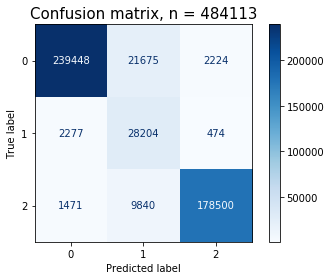

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf_pf, X_val, y_val_pf,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val_pf)}', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val_pf, clf_pf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95    263347
           1       0.47      0.91      0.62     30955
           2       0.99      0.94      0.96    189811

    accuracy                           0.92    484113
   macro avg       0.81      0.92      0.84    484113
weighted avg       0.95      0.92      0.93    484113



In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_pf, clf_pf.predict_proba(X_val),multi_class='ovr')
auc_score

0.9815810750742621

In [ ]:
# test 예측 결과 sample_submission에 넣기  # 하다가 다운되서 최적 파라미터 넣은 모델 이용

test_pf=test_processed.copy()
test_pf['label_역률평균']=None
X_test=pfengineering(test_pf)
X_test.drop('label_역률평균',axis=1,inplace=True)
sample_submission['label_역률평균']=model_pf2.predict(X_test)
sample_submission['label_역률평균']=sample_submission['label_역률평균'].apply(str).replace('0','정상')
sample_submission['label_역률평균']=sample_submission['label_역률평균'].replace('1','주의')
sample_submission['label_역률평균']=sample_submission['label_역률평균'].replace('2','경고')

In [ ]:
# pf에 대한 shap # 하다가 다운되서 최적 파라미터 넣은 모델 이용

# import shap

# row = X_test.iloc[[3]]

# explainer = shap.Explainer(model_pf2.named_steps['logisticregression'],X_train,feature_names=X_train.columns)
# shap_values = explainer(X_test)

# shap.initjs()
# shap.force_plot(
#     base_value=explainer.expected_value, 
#     shap_values=shap_values,
#     features=row
# )


Exception: ignored

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


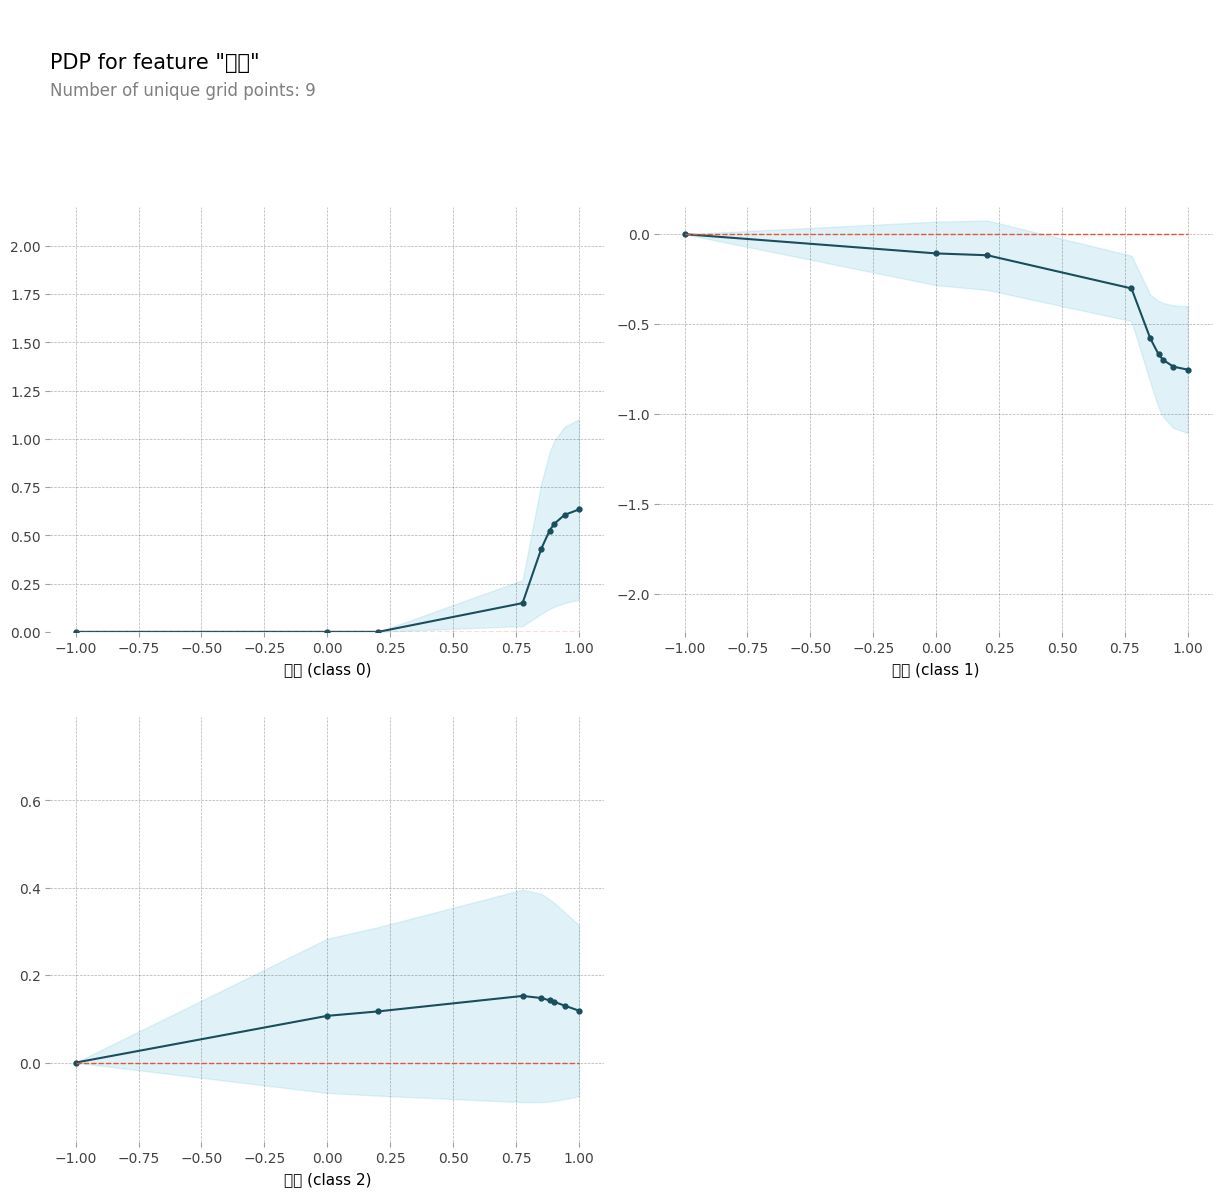

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '역률'
isolated = pdp_isolate(
    model=model_pf2, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
## 전류고조파평균

In [ ]:
Xy_train

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,...,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
2323903,1.107392e+07,95288.0,41848.0,59.928820,163.239578,213.000000,368.833344,46.875,31092.0,9420.0,...,214.750,372.750,28396.0,16148.0,152.71875,213.50,365.75,0,0,1
828817,3.595481e+06,0.0,0.0,59.826096,0.000000,227.666672,394.083344,33.125,0.0,0.0,...,227.750,392.000,0.0,0.0,0.00000,226.25,393.75,2,0,0
696723,0.000000e+00,0.0,0.0,0.000000,155.500000,0.000000,0.000000,23.125,0.0,0.0,...,0.000,0.000,0.0,0.0,146.81250,0.00,0.00,2,1,0
470526,3.754244e+06,89838.0,42774.0,59.910110,128.489578,259.333344,448.916656,37.500,29032.0,12340.0,...,259.750,451.750,29342.0,15614.0,128.09375,260.50,448.25,0,0,1
1134942,2.126530e+07,33459.5,39004.5,60.005000,77.708000,214.671000,371.822000,18.750,13332.5,11943.5,...,212.699,212.699,13231.0,9078.0,73.00000,216.02,216.02,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606731,6.301934e+06,22618.0,9631.5,59.891422,36.666668,223.416672,387.333344,24.375,7244.0,2449.5,...,224.500,387.500,7919.0,3310.0,38.53125,222.75,386.50,0,0,1
1997099,3.106334e+06,23838.0,57544.0,59.947537,95.229164,218.083328,377.750000,48.125,8134.0,19244.0,...,219.000,379.250,7558.0,19334.0,95.18750,218.00,376.00,2,1,0
2300397,8.190548e+04,0.0,0.0,59.844740,0.000000,220.416672,380.583344,10.625,0.0,0.0,...,220.500,379.500,0.0,0.0,0.00000,219.25,378.75,2,0,2
2198031,2.138206e+05,94472.0,41168.0,59.872740,158.270828,217.666672,376.666656,43.125,31360.0,10500.0,...,219.250,380.000,28892.0,14716.0,148.90625,218.00,373.75,0,0,1


In [ ]:
def ithdengineering(df):
  return df[['주파수','전류평균','온도','R상전류','S상전류','T상전류','label_전류고조파평균']]

In [ ]:
Xy_train_ithd=ithdengineering(Xy_train.copy())
Xy_val_ithd=ithdengineering(Xy_val.copy())

In [ ]:
Xy_train_ithd

,주파수,전류평균,온도,R상전류,S상전류,T상전류,label_전류고조파평균
2323903,59.928820,163.239578,46.875,154.0000,183.00000,152.71875,0
828817,59.826096,0.000000,33.125,0.0000,0.00000,0.00000,0
696723,0.000000,155.500000,23.125,157.2500,162.43750,146.81250,1
470526,59.910110,128.489578,37.500,122.9375,134.43750,128.09375,0
1134942,60.005000,77.708000,18.750,70.3750,89.75000,73.00000,0
...,...,...,...,...,...,...,...
1606731,59.891422,36.666668,24.375,34.1875,37.28125,38.53125,0
1997099,59.947537,95.229164,48.125,96.1250,94.37500,95.18750,1
2300397,59.844740,0.000000,10.625,0.0000,0.00000,0.00000,0
2198031,59.872740,158.270828,43.125,153.6250,172.28125,148.90625,0


In [ ]:
ifeatures=Xy_train_ithd.drop(ithdtarget,axis=1).columns
X_train=Xy_train_ithd[ifeatures]
y_train_ithd=Xy_train_ithd[ithdtarget]
X_val=Xy_val_ithd[ifeatures]
y_val_ithd=Xy_val_ithd[ithdtarget]

In [ ]:
# 기준 모델 - 최빈값

major = y_train_ithd.mode().iloc[0][0]

y_pred = [major] * len(y_train_ithd)
print("훈련세트 accuracy: ", accuracy_score(y_train_ithd, y_pred))

y_pred = [major] * len(y_val_ithd)
print("검증세트 accuracy: ", accuracy_score(y_val_ithd, y_pred))

훈련세트 accuracy:  0.8071922257819972
검증세트 accuracy:  0.8067682545190895


In [ ]:
# 랜덤포레스트분류
from sklearn.ensemble import RandomForestClassifier

model_ithd=make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(random_state=2,n_jobs=-1,oob_score=True,class_weight='balanced')
)

dists = {
        'randomforestclassifier__max_depth':[5,None],
        'randomforestclassifier__n_estimators':randint(50,150)
    }
clf_ithd = RandomizedSearchCV(
        model_ithd, 
        param_distributions=dists, 
        n_iter=5, 
        cv=3,
        scoring='f1_macro',
        verbose=1,
        n_jobs=-1
    )

clf_ithd.fit(X_train,y_train_ithd)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     n_jobs=-1,
                                                                     oob_score=True,
                                                                     random_state=2))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              None],
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f

In [ ]:
# 하다가 다운되서 최적파라미터를 그대로 입력

model_ithd2=make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(random_state=2,n_jobs=-1,oob_score=True,class_weight='balanced',n_estimators=142)
)
model_ithd2.fit(X_train,y_train_ithd)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=142, n_jobs=-1,
                                        oob_score=True, random_state=2))])

In [ ]:
print("Optimal Hyperparameter:", clf_ithd.best_params_)

Optimal Hyperparameter: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 142}


In [ ]:
print("훈련세트 accuracy: ", accuracy_score(y_train_ithd, clf_ithd.predict(X_train)))
print("검증세트 accuracy: ", accuracy_score(y_val_ithd, clf_ithd.predict(X_val)))

훈련세트 accuracy:  0.9978966687529565
검증세트 accuracy:  0.9771664879893743


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


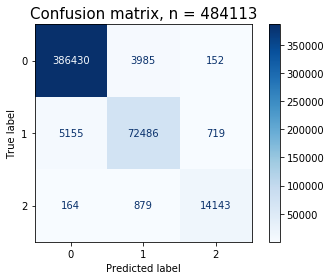

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf_ithd, X_val, y_val_ithd,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val_ithd)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_val_ithd, clf_ithd.predict(X_val)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    390567
           1       0.94      0.93      0.93     78360
           2       0.94      0.93      0.94     15186

    accuracy                           0.98    484113
   macro avg       0.96      0.95      0.95    484113
weighted avg       0.98      0.98      0.98    484113



In [ ]:
auc_score = roc_auc_score(y_val_ithd, clf_ithd.predict_proba(X_val),multi_class='ovr')
auc_score

0.9951049784830225

In [ ]:
# test 예측결과 sample_submission에 넣기 ## 하다가 다운되서 최적 파라미터 넣은 모델 이용
test_ithd=test_processed.copy()
test_ithd['label_전류고조파평균']=None
X_test=ithdengineering(test_ithd)
X_test.drop('label_전류고조파평균',axis=1,inplace=True)
sample_submission['label_전류고조파평균']=model_ithd2.predict(X_test)
sample_submission['label_전류고조파평균']=sample_submission['label_전류고조파평균'].apply(str).replace('0','정상')
sample_submission['label_전류고조파평균']=sample_submission['label_전류고조파평균'].replace('1','주의')
sample_submission['label_전류고조파평균']=sample_submission['label_전류고조파평균'].replace('2','경고')

In [ ]:
# ithd에 대한 shap

import shap

row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(model_ithd2.named_steps['randomforestclassifier'])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0],
    features=row
)

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300])

KeyboardInterrupt: ignored

In [ ]:
## 전압고조파평균

In [ ]:
Xy_train

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,...,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
2323903,1.107392e+07,95288.0,41848.0,59.928820,163.239578,213.000000,368.833344,46.875,31092.0,9420.0,...,214.750,372.750,28396.0,16148.0,152.71875,213.50,365.75,0,0,1
828817,3.595481e+06,0.0,0.0,59.826096,0.000000,227.666672,394.083344,33.125,0.0,0.0,...,227.750,392.000,0.0,0.0,0.00000,226.25,393.75,2,0,0
696723,0.000000e+00,0.0,0.0,0.000000,155.500000,0.000000,0.000000,23.125,0.0,0.0,...,0.000,0.000,0.0,0.0,146.81250,0.00,0.00,2,1,0
470526,3.754244e+06,89838.0,42774.0,59.910110,128.489578,259.333344,448.916656,37.500,29032.0,12340.0,...,259.750,451.750,29342.0,15614.0,128.09375,260.50,448.25,0,0,1
1134942,2.126530e+07,33459.5,39004.5,60.005000,77.708000,214.671000,371.822000,18.750,13332.5,11943.5,...,212.699,212.699,13231.0,9078.0,73.00000,216.02,216.02,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606731,6.301934e+06,22618.0,9631.5,59.891422,36.666668,223.416672,387.333344,24.375,7244.0,2449.5,...,224.500,387.500,7919.0,3310.0,38.53125,222.75,386.50,0,0,1
1997099,3.106334e+06,23838.0,57544.0,59.947537,95.229164,218.083328,377.750000,48.125,8134.0,19244.0,...,219.000,379.250,7558.0,19334.0,95.18750,218.00,376.00,2,1,0
2300397,8.190548e+04,0.0,0.0,59.844740,0.000000,220.416672,380.583344,10.625,0.0,0.0,...,220.500,379.500,0.0,0.0,0.00000,219.25,378.75,2,0,2
2198031,2.138206e+05,94472.0,41168.0,59.872740,158.270828,217.666672,376.666656,43.125,31360.0,10500.0,...,219.250,380.000,28892.0,14716.0,148.90625,218.00,373.75,0,0,1


In [ ]:
def vthdengineering(df):
  return df[['주파수','상전압평균','선간전압평균','온도','R상전압','R상선간전압','S상전압','S상선간전압','T상전압', 'T상선간전압','label_전압고조파평균']]

In [ ]:
Xy_train_vthd=vthdengineering(Xy_train.copy())
Xy_val_vthd=vthdengineering(Xy_val.copy())

In [ ]:
Xy_train_vthd

,주파수,상전압평균,선간전압평균,온도,R상전압,R상선간전압,S상전압,S상선간전압,T상전압,T상선간전압,label_전압고조파평균
2323903,59.928820,213.000000,368.833344,46.875,210.750,368.000,214.750,372.750,213.50,365.75,1
828817,59.826096,227.666672,394.083344,33.125,229.000,396.500,227.750,392.000,226.25,393.75,0
696723,0.000000,0.000000,0.000000,23.125,0.000,0.000,0.000,0.000,0.00,0.00,0
470526,59.910110,259.333344,448.916656,37.500,257.750,446.750,259.750,451.750,260.50,448.25,1
1134942,60.005000,214.671000,371.822000,18.750,215.295,215.295,212.699,212.699,216.02,216.02,2
...,...,...,...,...,...,...,...,...,...,...,...
1606731,59.891422,223.416672,387.333344,24.375,223.000,388.000,224.500,387.500,222.75,386.50,1
1997099,59.947537,218.083328,377.750000,48.125,217.250,378.000,219.000,379.250,218.00,376.00,0
2300397,59.844740,220.416672,380.583344,10.625,221.500,383.500,220.500,379.500,219.25,378.75,2
2198031,59.872740,217.666672,376.666656,43.125,215.750,376.250,219.250,380.000,218.00,373.75,1


In [ ]:
vfeatures=Xy_train_vthd.drop(vthdtarget,axis=1).columns
X_train=Xy_train_vthd[vfeatures]
y_train_vthd=Xy_train_vthd[vthdtarget]
X_val=Xy_val_vthd[vfeatures]
y_val_vthd=Xy_val_vthd[vthdtarget]

In [ ]:
# 기준 모델 - 최빈값

major = y_train_vthd.mode().iloc[0][0]

y_pred = [major] * len(y_train_vthd)
print("훈련세트 accuracy: ", accuracy_score(y_train_vthd, y_pred))

y_pred = [major] * len(y_val_vthd)
print("검증세트 accuracy: ", accuracy_score(y_val_vthd, y_pred))

훈련세트 accuracy:  0.41070783060979565
검증세트 accuracy:  0.4108090466481999


In [ ]:
# xgboost
from xgboost import XGBClassifier

model_vthd = make_pipeline(
    SimpleImputer(),
    XGBClassifier( random_state=2
                  , n_jobs=-1
                 )
)

dists = {
        'xgbclassifier__max_depth':[5,7,None],
        'xgbclassifier__n_estimators':[100,200],
        'xgbclassifier__learning_rate':[0.1,0.2]
    }
clf_vthd = RandomizedSearchCV(
        model_vthd, 
        param_distributions=dists, 
        n_iter=5, 
        cv=3,
        scoring='f1_macro',
        verbose=1,
        n_jobs=-1
    )

clf_vthd.fit(X_train,y_train_vthd)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('xgbclassifier',
                                              XGBClassifier(n_jobs=-1,
                                                            random_state=2))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'xgbclassifier__learning_rate': [0.1,
                                                                         0.2],
                                        'xgbclassifier__max_depth': [5, 7,
                                                                     None],
                                        'xgbclassifier__n_estimators': [100,
                                                                        200]},
                   scoring='f1_macro', verbose=1)

In [ ]:
# xgboost  # 하다가 다운되서 최적 파라미터 그대로 넣은 모델
from xgboost import XGBClassifier

model_vthd2 = make_pipeline(
    SimpleImputer(),
    XGBClassifier( random_state=2
                  , n_jobs=-1
                  , n_estimators=200
                  , max_depth = 7
                  , learning_rate=0.1
                 )
)
model_vthd2.fit(X_train,y_train_vthd)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(max_depth=7, n_estimators=200, n_jobs=-1,
                               objective='multi:softprob', random_state=2))])

In [ ]:
print("Optimal Hyperparameter:", clf_vthd.best_params_)

Optimal Hyperparameter: {'xgbclassifier__n_estimators': 200, 'xgbclassifier__max_depth': 7, 'xgbclassifier__learning_rate': 0.1}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform

# model_vthd2=make_pipeline(
#     SimpleImputer(),
#     StandardScaler(),
#     RandomForestClassifier(random_state=2,n_jobs=-1,oob_score=True,class_weight='balanced')
# )

# dists = {
#         'randomforestclassifier__max_depth':[5,None],
#         'randomforestclassifier__n_estimators':[50,100,150]
#     }
# clf_vthd2 = RandomizedSearchCV(
#         model_vthd2, 
#         param_distributions=dists, 
#         n_iter=5, 
#         cv=3,
#         scoring='f1_macro',
#         verbose=1,
#         n_jobs=-1
#     )

# clf_vthd2.fit(X_train,y_train_vthd)

In [ ]:
print("Optimal Hyperparameter:", clf_vthd2.best_params_)

In [ ]:
print("훈련세트 accuracy: ", accuracy_score(y_train_vthd, clf_vthd.predict(X_train)))
print("검증세트 accuracy: ", accuracy_score(y_val_vthd, clf_vthd.predict(X_val)))

훈련세트 accuracy:  0.8490889523726899
검증세트 accuracy:  0.8470129907686842


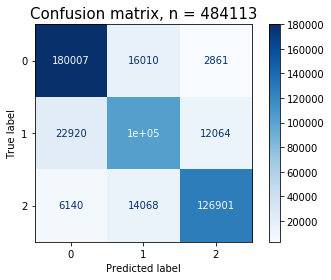

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf_vthd, X_val, y_val_vthd,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val_vthd)}', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val_vthd, clf_vthd.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88    198878
           1       0.77      0.75      0.76    138126
           2       0.89      0.86      0.88    147109

    accuracy                           0.85    484113
   macro avg       0.84      0.84      0.84    484113
weighted avg       0.85      0.85      0.85    484113



In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_vthd, clf_vthd.predict_proba(X_val),multi_class='ovr')
auc_score

0.9584304264019479

In [ ]:
# test 예측결과 sample_submission에 넣기 # 하다가 다운되서 최적파라미터 넣은 모델 사용

test_vthd = test_processed.copy()
test_vthd['label_전압고조파평균']=None
X_test=vthdengineering(test_vthd)
X_test.drop('label_전압고조파평균',axis=1,inplace=True)
sample_submission['label_전압고조파평균']=model_vthd2.predict(X_test)
sample_submission['label_전압고조파평균']=sample_submission['label_전압고조파평균'].apply(str).replace('0','정상')
sample_submission['label_전압고조파평균']=sample_submission['label_전압고조파평균'].replace('1','주의')
sample_submission['label_전압고조파평균']=sample_submission['label_전압고조파평균'].replace('2','경고')

In [ ]:
# vthd에 대한 shap

import shap

row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(model_vthd.named_steps['xgbclassifier'])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0],
    features=row
)

In [ ]:
sample_submission

,ID,label_역률평균,label_전류고조파평균,label_전압고조파평균
0,0,정상,정상,정상
1,1,경고,정상,정상
2,2,정상,정상,경고
3,3,정상,정상,정상
4,4,주의,주의,경고
...,...,...,...,...
313262,313263,경고,정상,주의
313263,313264,경고,정상,경고
313264,313265,경고,정상,정상
313265,313266,경고,정상,정상


In [ ]:
sample_submission.to_csv('project2.csv')